# Jupyter Notebook

Consider a single atom coupled to a single cavity mode, as illustrated in the figure below. If there atom excitation rate Γ exceeds the relaxation rate, a population inversion can occur in the atom, and if coupled to the cavity the atom can then act as a photon pump on the cavity.

<img src='https://scipy-lectures.org/_images/random_c.jpg'>

In [126]:
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

# Pandas

In [153]:
import pandas as pd
df = pd.read_excel("titanic1.xlsx")

In [143]:
df['minor'] = df['age'] < 18

In [144]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender,minor
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,False


In [146]:
result = df.pivot_table("survived", "embark_town", "class")
result

class,First,Second,Third
embark_town,,,
Cherbourg,0.694118,0.529412,0.378788
Queenstown,0.500000,0.666667,0.375000
Southampton,0.582677,0.463415,0.189802


# Matplotlib

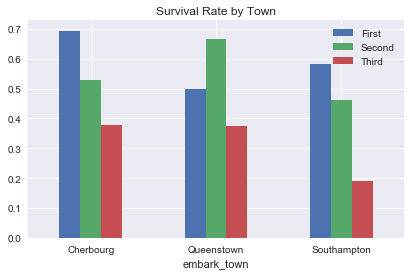

In [148]:
from matplotlib import pyplot as plt
%matplotlib inline

graph = result.plot(kind='bar')
graph.legend()

plt.xticks(rotation='horizontal')
plt.style.use("seaborn")
plt.title("Survival Rate by Town")

plt.savefig('test.pdf')

In [151]:
url = "https://www.quandl.com/api/v3/datasets/EOD/AAPL.csv"
query_string = "?api_key=K2km7t6m9xhmYRD7zCPY"
aapl = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')

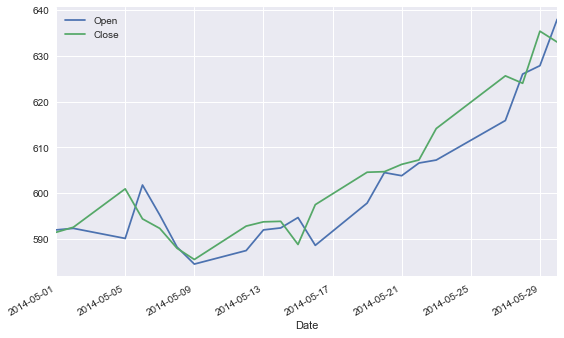

In [152]:
aapl['2014-05'][['Open', 'Close']].plot()

# Sci-Kit Learn

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [155]:
model = LogisticRegression(solver="lbfgs")

In [159]:
clean = df.dropna()
X = clean[['gender','age', 'pclass']]
y = clean['survived']

model.fit(X, y)

model.predict([[1, 30, 2]])

array([0])

In [161]:
model.score(X,y)

0.7857142857142857

In [162]:
confusion_matrix(model.predict(clean[columns]), clean['survived'])

array([[ 38,  18],
       [ 21, 105]])